In [115]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

In [116]:
data = pd.read_csv('./data/train.csv')

In [117]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [119]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def back_prop(Z1, A1, Z2, A2, W2, A3, W3, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3


In [120]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in tqdm(range(iterations), desc="Training Progress"):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1, A1, Z2, A2, W2, A3, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if (i + 1 % 1000 == 0:
            print("Iteration : ", i+1)
            print("Accuracy : ", get_accuracy(get_predictions(A3), Y))
    return W1, b1, W2, b2, W3, b3

In [121]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 10000, 0.2)

Training Progress:  10%|█         | 1001/10000 [02:20<22:55,  6.54it/s]

Iteration :  1000
Accuracy :  0.8963658536585366


Training Progress:  20%|██        | 2001/10000 [04:43<19:15,  6.92it/s]

Iteration :  2000
Accuracy :  0.9243902439024391


Training Progress:  30%|███       | 3001/10000 [07:05<14:32,  8.03it/s]

Iteration :  3000
Accuracy :  0.934829268292683


Training Progress:  40%|████      | 4001/10000 [09:28<17:07,  5.84it/s]

Iteration :  4000
Accuracy :  0.9374146341463415


Training Progress:  50%|█████     | 5001/10000 [11:50<13:28,  6.19it/s]

Iteration :  5000
Accuracy :  0.9431219512195121


Training Progress:  60%|██████    | 6001/10000 [14:12<09:28,  7.03it/s]

Iteration :  6000
Accuracy :  0.9453414634146341


Training Progress:  70%|███████   | 7001/10000 [16:36<06:48,  7.34it/s]

Iteration :  7000
Accuracy :  0.9492682926829268


Training Progress:  80%|████████  | 8001/10000 [18:55<04:46,  6.98it/s]

Iteration :  8000
Accuracy :  0.9503658536585365


Training Progress:  90%|█████████ | 9001/10000 [21:12<02:22,  6.99it/s]

Iteration :  9000
Accuracy :  0.9514634146341463


Training Progress: 100%|██████████| 10000/10000 [23:25<00:00,  7.11it/s]

Iteration :  10000
Accuracy :  0.9536585365853658


In [122]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

295
Prediction:  [2]
Label:  2


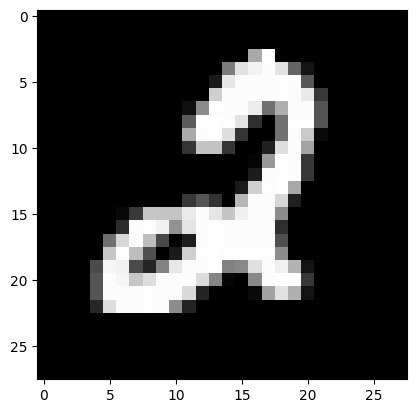

In [123]:
_, l = X_dev.shape
random_number = random.randint(1, l)
print(random_number)

test_prediction(random_number, W1, b1, W2, b2, W3, b3)

In [124]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
acc = get_accuracy(dev_predictions, Y_dev) * 100
print(acc)

93.5
